In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import math

%matplotlib inline

In [57]:
MaxQuestionLength = 40   # words

def normalize_question(q):
    q = q.lower()
    q = q.replace("?"," ? ")
    q = q.replace("..."," . ")
    q = q.replace(".."," . ")
    q = q.replace("."," . ")
    q = q.replace(":"," : ")
    q = q.replace(","," , ")
    q = q.replace("/"," / ")
    q = q.replace("("," ( ")
    q = q.replace(")"," ) ")
    q = q.replace("n't"," not ")    
    q = q.replace("i'm", "i am")
    q = q.replace("[math]", " [math] ")
    q = q.replace("[/math]", " [/math] ")
    q = q.replace("-"," - ")
    q = q.replace('"',' " ')
    q = q.replace('\xe2\x80\x9c', ' " ').replace('\xe2\x80\x9d', ' " ')    
    q = q.replace("'s", " 's ")
    words = q.lower().split()[:MaxQuestionLength]
    #words = map(lambda x: x.strip(), words)
    #words = filter(lambda x: len(x) > 0, words)
    words = map(lambda w: w[:-1] + " s" if len(w)>3 and w[-1]=='s' and 
                not w in ("this", "does") else w, words)
    return " ".join(words)

def word_frequencies(questions):
    words = " ".join(questions).split(" ")
    counter = Counter(words)
    return sorted(counter.items(), key=lambda x:-x[1])

def word_appearance_in_questions(questions):
    # how many questions does the word appear in ?
    c = Counter()
    for q in questions:
        c.update(set(q.split()))
    return list(c.most_common())


def cumulative_by_index(counts):
    s = 0
    cx, cy = [], []
    for i, n in enumerate(counts):
        s += n
        cx.append(i+1)
        cy.append(s)
    x = np.array(cx, dtype=np.float32)
    y = np.array(cy, dtype=np.float32)/s
    return x, y

def cumulative_by_value(n):
    # assumes n is sorted ascending or descending
    s = 0
    cx, cy = [], []
    last_n = None
    for ni in n:
        s += 1
        if ni != last_n:
            last_n = ni
            cx.append(ni)
            cy.append(s)
        else:
            cy[-1] = s
    x = np.array(cx)
    y = np.array(cy, dtype=np.float32)/s
    return x, y


def plot_cumulative(cx, cy, xlim=None):

    ticks_major = np.arange(0.0, 1.1, 0.1)
    ticks_minor = np.arange(0.0, 1.1, 0.05)

    xticks = np.arange(0.0, 200.0, 10)

    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1)                                                      

    ax.plot(cx, cy)
    ax.set_xticks(xticks)                                                       
    ax.set_yticks(ticks_major)                                                       
    ax.set_yticks(ticks_minor, minor=True)                                                       
    ax.grid(True, which="both")
    plt.xscale("log")
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()

In [8]:
train_df=pd.read_csv("/Users/igorvm/Projects/Neural/questions/data/train.csv")
train_df.fillna("", inplace=True)
print "Train set loaded:", len(train_df)

test_df = pd.read_csv("/Users/igorvm/Projects/Neural/questions/data/test.csv")
test_df.fillna("", inplace=True)
print "Test set loaded:", len(test_df)


Train set loaded: 404290
Test set loaded: 2345796
questions normalized


In [58]:
test_questions = map(normalize_question, test_df["question1"].tolist() + test_df["question2"].tolist())
train_questions = map(normalize_question, train_df["question1"].tolist() + train_df["question2"].tolist())

print "questions normalized"

all_questions = set(test_questions) | set(train_questions)    # normalized already

print "train questions:", len(train_questions)
print "test questions:", len(test_questions)
print "all questions:", len(all_questions)
print "overlap:", len(train_questions) + len(test_questions) - len(all_questions)
print "longest question:", np.max(map(lambda q: len(q.split()), all_questions))



questions normalized
train questions: 808580
test questions: 4691592
all questions: 4783352
overlap: 716820
longest question: 51


In [51]:
nonmatch_pairs = [(q1.split(), q2.split()) for 
    i, q1, q2, dup in train_df[["question1", "question2","is_duplicate"]].itertuples()
    if not dup]

l = [min(len(q1), len(q2)) for q1, q2 in nonmatch_pairs]

[  0.8   1.6   2.4   3.2   4.    4.8   5.6   6.4   7.2   8.    8.8   9.6
  10.4  11.2  12.   12.8  13.6  14.4  15.2  16.   16.8  17.6  18.4  19.2
  20.   20.8  21.6  22.4  23.2  24.   24.8  25.6  26.4  27.2  28.   28.8
  29.6  30.4  31.2  32.   32.8  33.6  34.4  35.2  36.   36.8  37.6  38.4
  39.2  40.   40.8  41.6  42.4  43.2  44.   44.8  45.6  46.4  47.2  48.
  48.8  49.6  50.4  51.2  52.   52.8  53.6  54.4  55.2  56.   56.8  57.6
  58.4  59.2  60.   60.8  61.6  62.4  63.2  64. ]
[  2.00000000e+00   9.00000000e+01   8.50000000e+01   4.68600000e+03
   0.00000000e+00   1.12650000e+04   1.75500000e+04   2.58480000e+04
   3.22810000e+04   0.00000000e+00   3.37350000e+04   2.87040000e+04
   2.40630000e+04   1.63030000e+04   0.00000000e+00   1.27240000e+04
   9.29000000e+03   7.82600000e+03   6.50600000e+03   0.00000000e+00
   4.97700000e+03   3.59900000e+03   2.89400000e+03   2.37000000e+03
   0.00000000e+00   2.11800000e+03   1.51400000e+03   1.39000000e+03
   1.08200000e+03   0.00000000

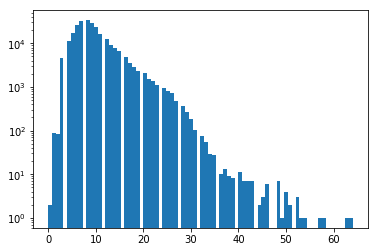

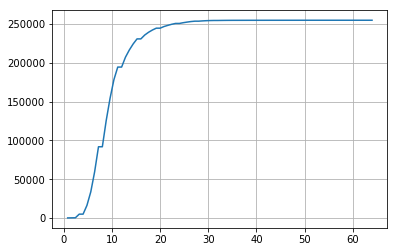

In [52]:
hist_y, hist_x, _ = plt.hist(l, bins=80)
hist_x = hist_x[1:]
print hist_x
print hist_y

cumulative = [np.sum(hist_y[:i+1]) for i in range(len(hist_y))]

plt.yscale("log")

plt.show()

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      
ax.plot(hist_x, cumulative)
ax.grid(True, which="both")
plt.show()


In [59]:
#train_frequencies = word_frequencies(train_questions)
#test_frequencies = word_frequencies(test_questions)
all_frequencies = word_appearance_in_questions(all_questions)

words in all questions: 127460


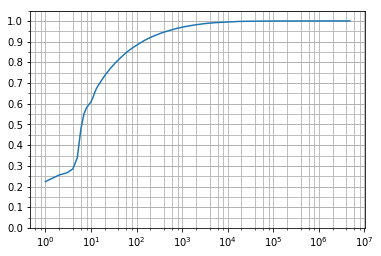

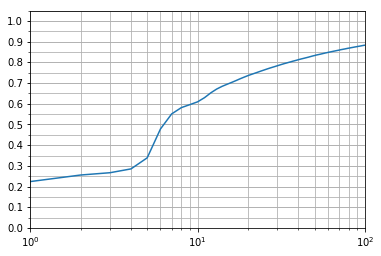

In [61]:
print "words in all questions:", len(all_frequencies)


maxf = all_frequencies[0][1]
cx, cy = cumulative_by_value([n for w, n in reversed(all_frequencies)])
rx = np.asarray(cx, dtype=np.float)/maxf
plot_cumulative(cx, cy)
plot_cumulative(cx, cy, xlim=(1,100))


In [63]:
all_frequencies = word_frequencies(all_questions)

In [74]:
VocabularySize = 10000
encoding = { w:i+1 for i, (w,n) in enumerate(all_frequencies[:VocabularySize])}

In [75]:
def encode_question(q):
    words = q.split()
    return map( lambda w: encoding.get(w, VocabularySize), words )

In [76]:
encoded_questions = map(encode_question, all_questions)

In [77]:
def count_unknowns(q):
    return len([w for w in q if w == VocabularySize])

In [78]:
n = map(count_unknowns, encoded_questions)

0 3250208
1 1109609
2 298018
3 81658
4 27228
5 9297
6 3657
7 1650
8 880
9 505
10 218
11 129
12 89
13 49
14 30
15 35
16 15
17 23
18 36
19 9


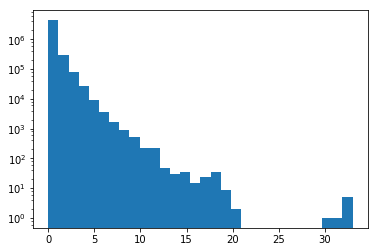

In [82]:
c = Counter(n)
for i in range(20):
    print i, c[i]
plt.hist(n, bins=30)
plt.yscale("log")
plt.show()